
<div class="alert alert-block alert-success"> 
<b>COMENTARIO GENERAL #1</b> <a class="tocSkip"></a>

Felicidades Luis! Tu trabajo es excelente. 

Demuestras un dominio sólido de los conceptos y los aplicas de forma correcta y coherente en cada paso del proyecto.


</div>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from math import factorial
from scipy import stats as st
import math as mt


In [2]:

df= pd.read_csv('/Users/lcamacho/Triple Ten/Sprint 6/games.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
df.columns = df.columns.str.lower()
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [4]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
df['rating'].fillna('Unknown', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


C:\Users\lcamacho\AppData\Local\Temp\ipykernel_33720\1422427527.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna('Unknown', inplace=True)


## Preparacion de los datos
Lo primero que se hizo fue importar todas las librerías que nos pudieran servir para nuestro proyecto posteriormente se arreglaron los datos para que todas las columnas estuvieran en minúsculas y tuviéramos un mejor control en el código.

La columna de año de lanzamiento se cambió a entero ya que los años no pueden contener décimas Y de informa se cambió la columna calificación del usuario a flotante ya que en la base de datos este dato contiene números enteros con décimas espera, Al hacer el cambio de este tipo de dato se le pidió a pandas que donde no hubiera números cambiar a la columna a un dato nulo

se creó la columna de ventas totales en donde se incluyeron las regiones de na eu JP y otras ventas sumando los valores para dar el total.

Después se procedió a eliminar los los datos ausentes en la columna nombre, genero y años de lanzamiento se decidió el eliminar estas columnas debido a que los datos nulos son muy pocos de nada afectará realmente a los datos de nuestra base de datos
a la columna rating los valores no los he cambiaron por desconocido ya que estos son demasiado sí si colocamos un número podría afectarle el resultado de nuestras además de base de datos
Las columnas que las vamos a dejar con datos nulos van a ser calificación crítica y calificación de usuario ya que si colocamos alguno valor ya sea media o promedio puede afectar los resultados de nuestra base de datos por lo que lo más sensato es dejarlos como nulos


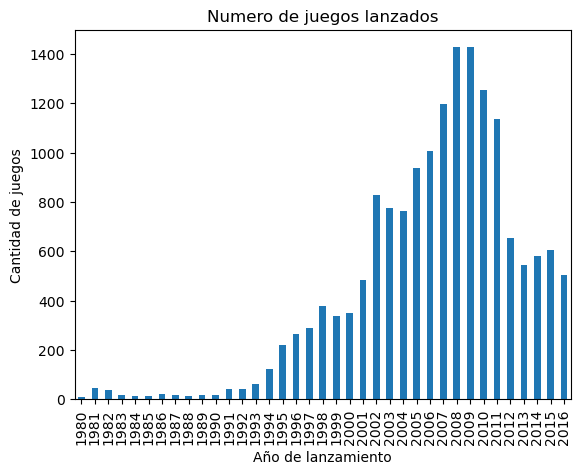

In [5]:
games_per_year = df.groupby('year_of_release')['name'].count()
games_per_year.plot(kind='bar', xlabel='Año de lanzamiento', ylabel='Cantidad de juegos', title='Numero de juegos lanzados')
plt.show()

## Analisi de datos

En la gráfica se puede observar que en los primeros años en la década de los 80 y noventas el número de lanzamientos es muy bajo probablemente porque la industria de los videojuegos todavía no estaba tan desarrollada posteriormente a mediados de la década de los 90 hasta el año 2005 se nota que fue el momento en el que el mercado comenzó a expandirse de forma significativa del 2006 al 2011 se observa un crecimiento exponencial con bastante número de lanzamientos en diferentes tipos de consola posiblemente porque fue una intensa competencia y expansión en el mercado después del 2012 el número de lanzamientos anuales comienza a disminuir probablemente por el cambio de modelo de negocio que fue requiriendo la industria

In [6]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("Top 10 plataformas por ventas totales:")
print(platform_sales.head(10))


Top 10 plataformas por ventas totales:
platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


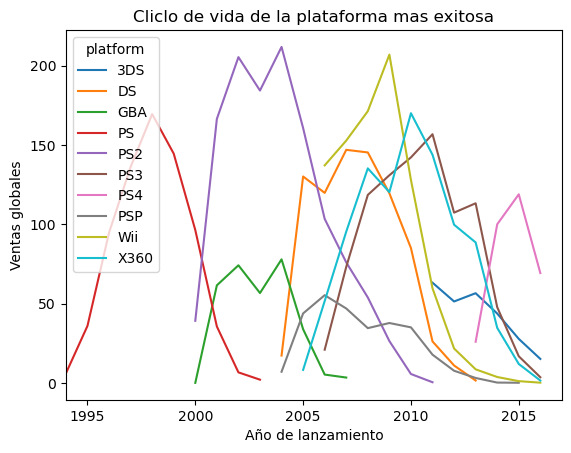

In [7]:
top_platforms = platform_sales.head(10).index
yearly_sales_pivot = df[df['platform'].isin(top_platforms)].pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum')

yearly_sales_pivot.plot(kind='line', title= 'Cliclo de vida de la plataforma mas exitosa', xlabel='Año de lanzamiento',
                        ylabel= "Ventas globales", xlim=(1994,2017))
plt.show()

El grafico muestra deiferentes patrones, una consola es lanzada justo cuando su predecesora es comenzando a disminuir sus ventas, la consolo que tuvo la mayor cantidad de ventas fue la PS2, pero sus ventas cayeron al rededor del 2011; otra consula fue el Nintendo DS quien tuvo su mayor exito entre el 2005 y 2010 pero sus ventas disminuyeron rapidamente, otra consula fue la nintendo Wii, sus ventas fueron muy altas en poco tiempo, pero sus cayeron muy rapido en el 2010; por ultimo las consolas PS3 y Xbox360 tuvieron ventas por mas tiempo y una gran competencia entre ellos pero al final fueron reemplazadas por la siguiente generacion de consolas 

In [8]:
lifespan_df = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
lifespan_df['lifespan'] = lifespan_df['max'] - lifespan_df['min'] + 1
lifespan_df = lifespan_df.join(platform_sales)
significant_platforms_lifespan = lifespan_df[lifespan_df['total_sales'] > 50].sort_values(by='lifespan', ascending=False)
average_lifespan = significant_platforms_lifespan['lifespan'].mean()

print("Ciclo de vida de plataformas significativas:")
print(significant_platforms_lifespan[['lifespan', 'total_sales']])
print(f"El ciclo de vida promedio de una plataforma importante es de aproximadamente {average_lifespan:.1f} años.")

Ciclo de vida de plataformas significativas:
          lifespan  total_sales
platform                       
PC              32       255.76
DS              29       802.78
GB              14       254.43
NES             12       251.05
PS2             12      1233.56
X360            12       961.24
PSP             12       289.53
PS3             11       931.34
Wii             11       891.18
SNES            10       200.04
PS              10       727.58
2600            10        86.48
XB               9       251.57
GBA              8       312.88
N64              7       218.01
GC               7       196.73
3DS              6       257.81
PSV              6        53.81
WiiU             5        82.19
PS4              4       314.14
XOne             4       159.32
El ciclo de vida promedio de una plataforma importante es de aproximadamente 11.0 años.


El periodo recomendado para hacer el análisis sería del 2014 al 2016 esto debido a que Las plataformas tienen un ciclo de vida de aproximadamente 10 años también sin embargo su punto máximo de venta es de cuatro a 6 años principalmente porque necesitamos los datos que reflejen el estado actual del mercado los datos más antiguos son que tienen un valor histórico no revelaría los datos correctos para poder hacer un análisis para el 2017

In [9]:
actual_df = df[df['year_of_release'].between(2014, 2016)].copy()
current_platform_sales = actual_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print("Ventas totales por plataforma (2014-2016) en millones:")
print(current_platform_sales)


Ventas totales por plataforma (2014-2016) en millones:
platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


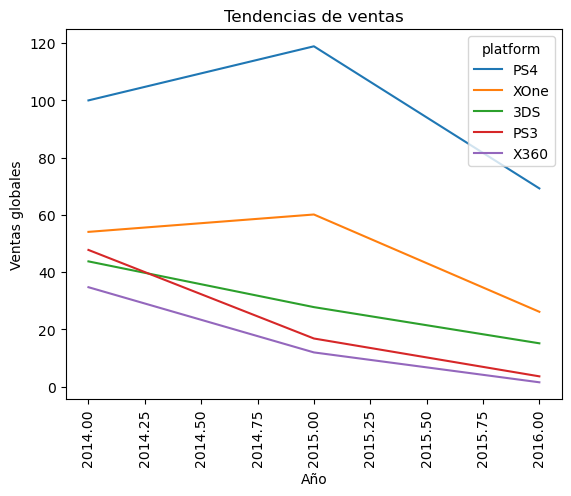

In [10]:
yearly_sales_pivot = actual_df.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum').fillna(0)
top_5_platforms = current_platform_sales.head(5).index
yearly_sales_pivot[top_5_platforms].plot(kind='line', title='Tendencias de ventas',
                                         xlabel='Año', ylabel='Ventas globales',rot=90)
plt.show()

Las plataformas lideres en ventas son las consolas PS4  y Xbox One, las consolas que estan en segundo termino, serian las Nintendo 3DS y las resuales de PS3.

Las plataformas que estan en crecimiento son las consolas PS4 y Xbox One, la primera ha sido la lider desde el 2014 y la segunda como su competencia directa; las consolas en reduccion seria principalmente PS3 y Xbox 360 muestran como tienden a ser abandonadas, y que para el 2017 las ventas serian casi nulas.

La principal plataforma a considerar como cercimiento, seria la PS4

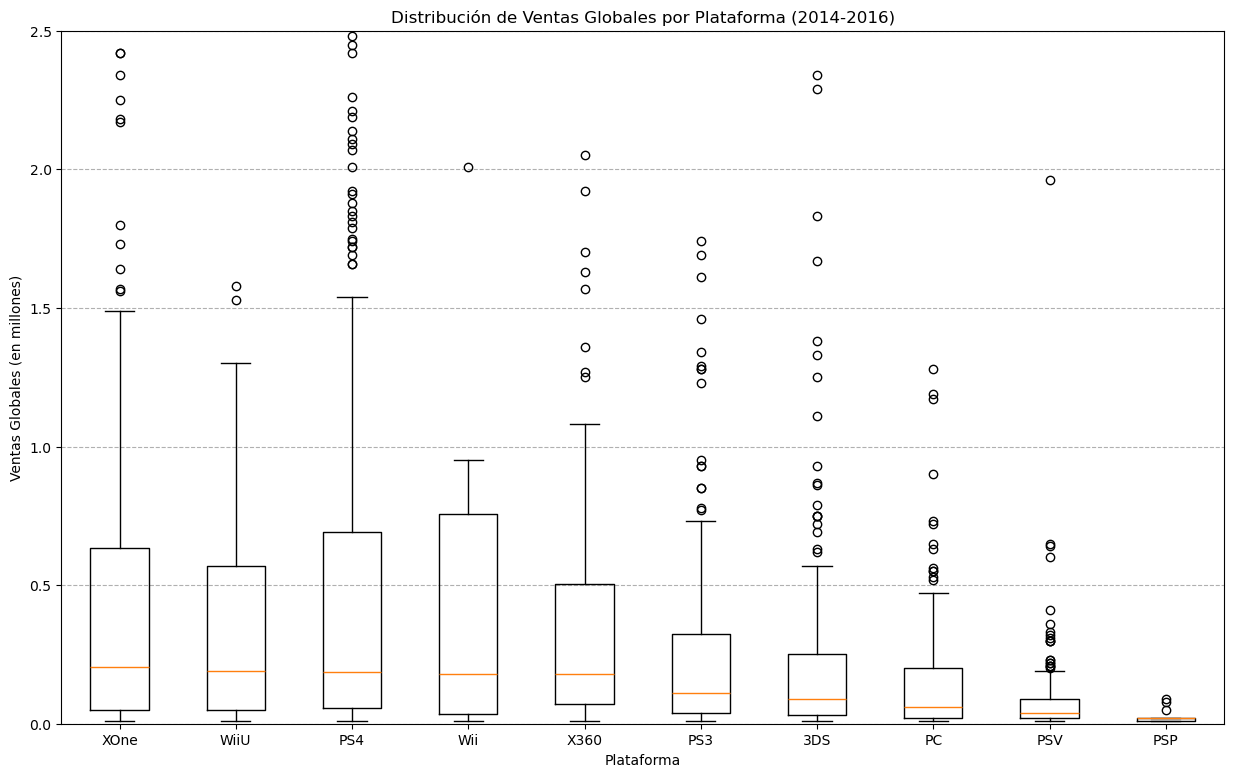

In [11]:
platform_order = actual_df.groupby('platform')['total_sales'].median().sort_values(ascending=False).index
data_to_plot = [actual_df[actual_df['platform'] == plat]['total_sales'] for plat in platform_order]
plt.figure(figsize=(15, 9))
plt.boxplot(data_to_plot)
plt.xticks(ticks=np.arange(len(platform_order)) + 1, labels=platform_order)
plt.ylim(0, 2.5)
plt.title('Distribución de Ventas Globales por Plataforma (2014-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones)')
plt.grid(axis='y', linestyle='--')
plt.show()


Las diferencias son significativas en las ventas, el diagrama de caja muestra que las consulas PS4 y Xbox One, tienen una mediana de ventas de juegos considrablemente alta, en comparacion con las generaciones anteriores como PS3 y Xbox 360, lo que en resumen significa es que es mas probable que tenga un videojuego un mayor exito de ventas si delanza con las plataformas PS4 y Xbox one, sin embargo aun asi no es un exito seguro, ya que el mercado depende de unos titulos extrella y ninguna de las copias supera el millon

In [12]:
sales_stats = actual_df.groupby('platform')['total_sales'].agg(['mean', 'median', 'sum']).sort_values(by='mean', ascending=False)
print("Comparación de Ventas Promedio y Mediana por Plataforma (2014-2016):")
print(sales_stats)

Comparación de Ventas Promedio y Mediana por Plataforma (2014-2016):
              mean  median     sum
platform                          
PS4       0.766356   0.185  288.15
XOne      0.615614   0.205  140.36
WiiU      0.588767   0.190   42.98
Wii       0.460909   0.180    5.07
X360      0.434414   0.180   48.22
3DS       0.408868   0.090   86.68
PS3       0.311324   0.110   68.18
PC        0.179139   0.060   27.05
PSV       0.075932   0.040   22.40
PSP       0.027692   0.020    0.36


Esta tabla confirma lo que se ve en el diagrame de cajas, hay pocos juegos que tienen ventas millonarias, lo que esta inflando el numero de promedio por ventas, en este caso la media nos da una visualizacion mas clara de lo que realmente un juego tipico tiene realmente en ventas.

Esto tambien nos indica que a pesar que PS4 ha sido lider en ventas, esto solo se debe al gran exito de algunos de sus videojuegos, mientras que Xbox One, sus videojuegos tienen bases mas solidas al tener un mediana mas alta que PS4.

En resumen PS4 sigue siendo el lider en ventas, aunque Xbox One no alcanza el volumen de ventas de PS4 aun asi es un competidor solido, debido a que tiene mas ventas en sus videojuegos en general. las demas consolas muestran una un declive en sus ventas, es muy dificl que se puedan generar ventas

In [13]:
ps4_df = actual_df[actual_df['platform'] == 'PS4'].copy()
ps4_df.dropna(subset=['critic_score', 'user_score'], inplace=True)
print(f"Número de juegos de PS4 con puntuaciones completas: {len(ps4_df)}")

Número de juegos de PS4 con puntuaciones completas: 234


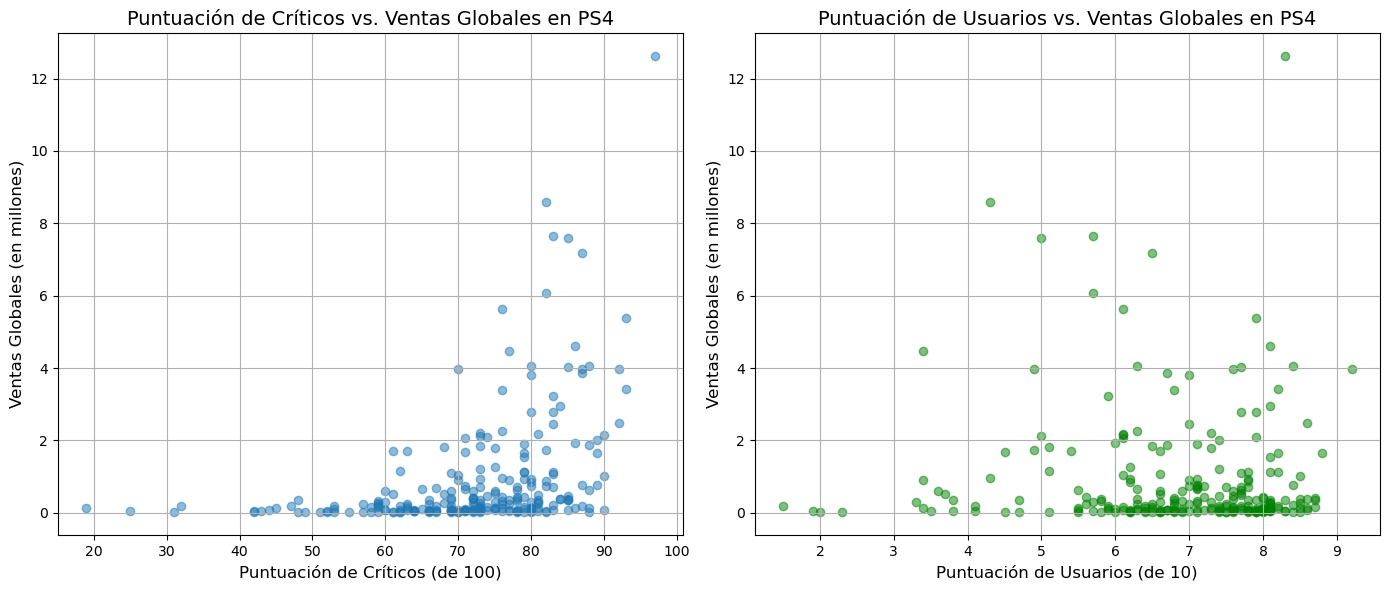

In [14]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=ps4_df['critic_score'], y=ps4_df['total_sales'], alpha=0.5)
plt.title('Puntuación de Críticos vs. Ventas Globales en PS4', fontsize=14)
plt.xlabel('Puntuación de Críticos (de 100)', fontsize=12)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.grid(True)
plt.subplot(1, 2, 2)
plt.scatter(x=ps4_df['user_score'], y=ps4_df['total_sales'], alpha=0.5, color='green')
plt.title('Puntuación de Usuarios vs. Ventas Globales en PS4', fontsize=14)
plt.xlabel('Puntuación de Usuarios (de 10)', fontsize=12)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.grid(True)

plt.tight_layout()
plt.show()

In [15]:
critic_correlation = ps4_df['critic_score'].corr(ps4_df['total_sales'])
user_correlation = ps4_df['user_score'].corr(ps4_df['total_sales'])

print("\n--- Coeficientes de Correlación ---")
print(f"Correlación entre Puntuación de Críticos y Ventas: {critic_correlation:.4f}")
print(f"Correlación entre Puntuación de Usuarios y Ventas: {user_correlation:.4f}")


--- Coeficientes de Correlación ---
Correlación entre Puntuación de Críticos y Ventas: 0.4019
Correlación entre Puntuación de Usuarios y Ventas: -0.0432


El analisis muestra que en la consula de PS4, los comentarios de los criticos coinciden con las ventas de cada video juego, mientras que los comentarios de los usuarios no lo estan. la diferencia es probable porque, por lo general las criticas de los expertos se generan antes o durante los lanzamientos, lo que puede generar una gran expetactiva por parte de los usuarios, esto por lo general aumenta de forma considerada las primeras semanas hasta que se tienen datos por parte de los usuarios y la desventaja de los usuarios es que son muy volatiles debido a los cambio y predisposiciones que puede tener cada usuario, lo mejor seria hacer caso a los critocos profecionales


In [16]:
juegos_a_comparar = [
    'Call of Duty: Advanced Warfare',
    'FIFA 16',
    'Fallout 4',
    'Destiny',
    'The Witcher 3: Wild Hunt']
comparison_df = actual_df[actual_df['name'].isin(juegos_a_comparar)].copy()
comparison_results = comparison_df[['name', 'platform', 'total_sales', 'critic_score', 'user_score']].sort_values(
    by=['name', 'total_sales'],
    ascending=[True, False])
print("Comparación de ventas de los mismos juegos en diferentes plataformas (2014-2016):")
print(comparison_results)

Comparación de ventas de los mismos juegos en diferentes plataformas (2014-2016):
                                name platform  total_sales  critic_score  \
92    Call of Duty: Advanced Warfare      PS4         7.66          83.0   
179   Call of Duty: Advanced Warfare     XOne         5.26          81.0   
255   Call of Duty: Advanced Warfare      PS3         4.36           NaN   
263   Call of Duty: Advanced Warfare     X360         4.28           NaN   
4736  Call of Duty: Advanced Warfare       PC         0.41          78.0   
154                          Destiny      PS4         5.64          76.0   
398                          Destiny     XOne         3.37          75.0   
898                          Destiny     X360         1.92           NaN   
1141                         Destiny      PS3         1.61           NaN   
77                           FIFA 16      PS4         8.58          82.0   
417                          FIFA 16     XOne         3.25          84.0   
552   

Por los datos en ls tablas nos podemos dar cuenta que la consula era realmente la que generaba las ventas, los juegos se compran mas para PS4 aunque tienen la calificacion muy silimar a su comtencia Xbox One, lo que para las productoras de videjuegos, seria muy importante priorizar sus lanzamientos para la consola PS4

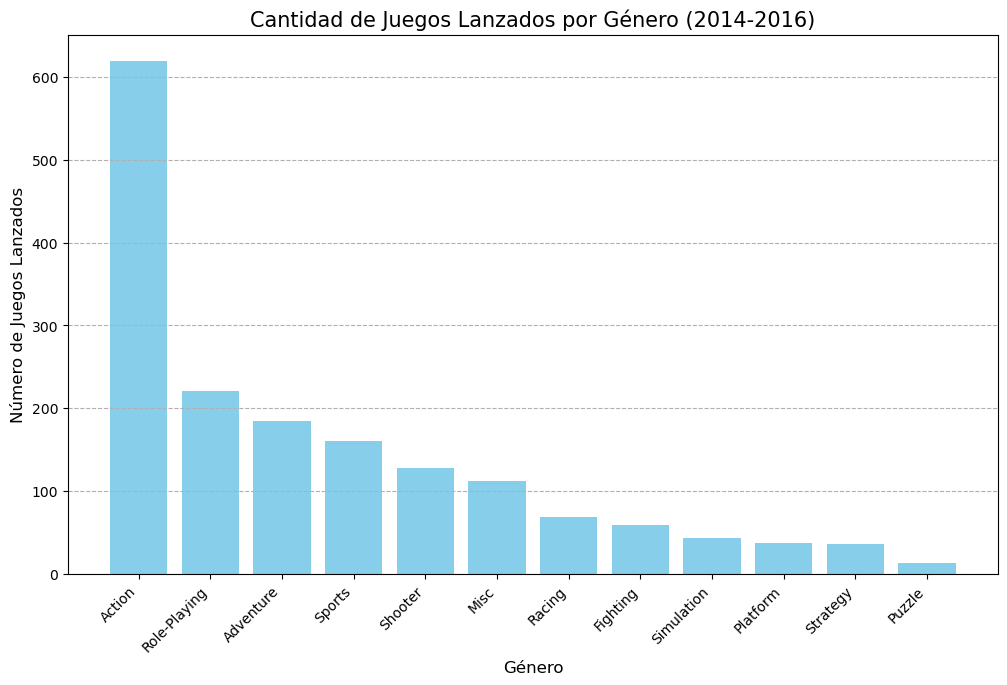

In [17]:
genre_counts = actual_df['genre'].value_counts()
plt.figure(figsize=(12, 7))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.title('Cantidad de Juegos Lanzados por Género (2014-2016)', fontsize=15)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Juegos Lanzados', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

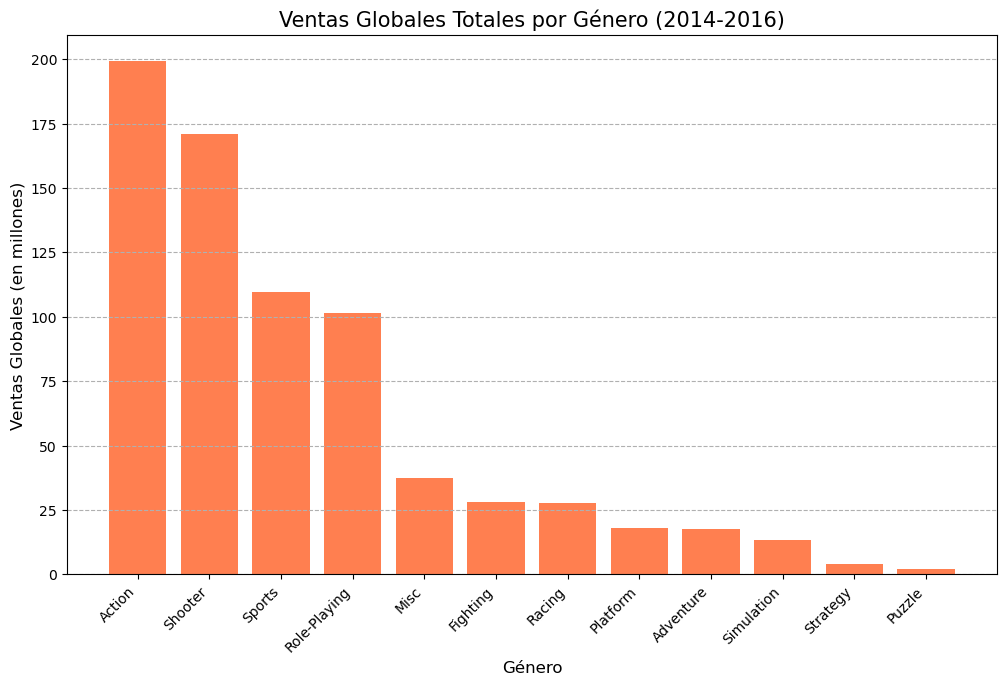

In [18]:
genre_total_sales = actual_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
plt.bar(genre_total_sales.index, genre_total_sales.values, color='coral')
plt.title('Ventas Globales Totales por Género (2014-2016)', fontsize=15)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Globales (en millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

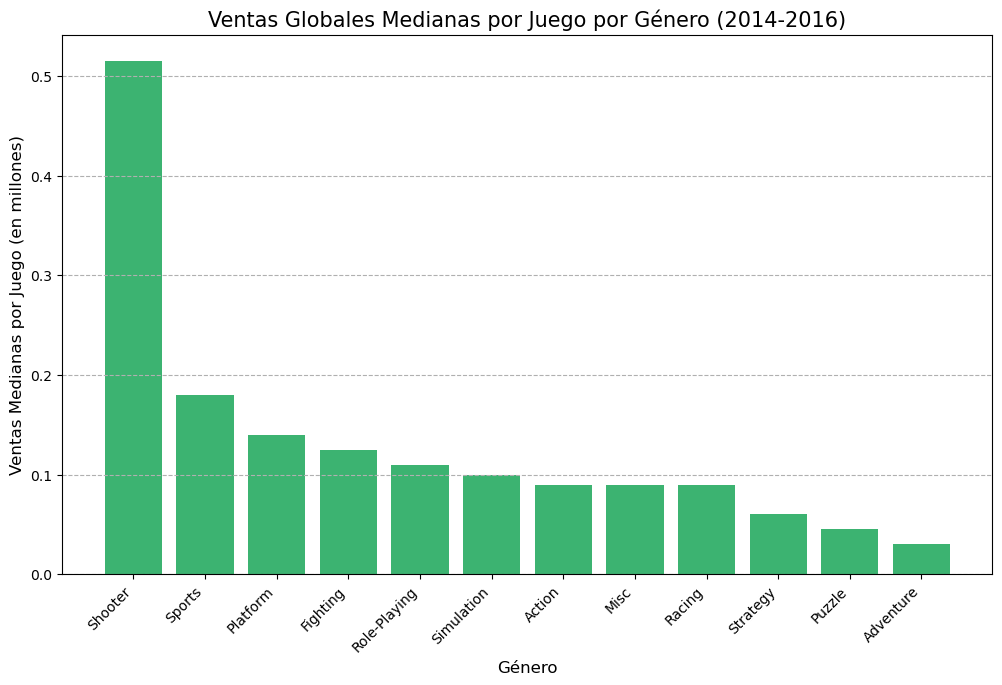

In [19]:
genre_median_sales = actual_df.groupby('genre')['total_sales'].median().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
plt.bar(genre_median_sales.index, genre_median_sales.values, color='mediumseagreen')
plt.title('Ventas Globales Medianas por Juego por Género (2014-2016)', fontsize=15)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Medianas por Juego (en millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Todos los gráficos y conclusiones son correctos. 

</div>

El genero accion, domina el mercado con mas de 600 titulos lanzados, esto puede hacer que esxita una competencia muy fuerte. de igual forma se puede notar que el genero de accion sigue siendo el genero que mas ingresos genera, pero se aproxima el genero de disparos, esto quiere decir que el genero de disparos y deportes son mejor eficientes con ventas, mientras que el de accion se debe mas que nada al gran volumen de lanzamientos. 

Con la tercer grafica se puede apreciar que relamente el genero mas eficiente es el de disparos siendo el genero mas rentable, un juego de este genero vende en promedio medio millon de copias, mas del doble que el genero de deportes, la venta del genero de accion es de menos de 0.1 millones. 

En resumen, los juegos que estan en el genero de disparos son los juegos mas rentables, tiene menos lanzamientos, pero cada uno tiene un gran impacto positivo en el mercado, siendo el genero de deportes como los segundos mas fiables. El genero de accion, es el que genera mas ventas por el volumen de lanzamientos que tiene, es dependiente a que el titulo sea un gran exito, pero en general el genero no se vende bien

En cuanto al analisis para poder saber a que apostar para el 2017. la respuesta seria a juegos de disparos y deportes; y priorizarlos en la consola PS4, asi hay una gran probabilidad de estabilidad e incremento de ganancias

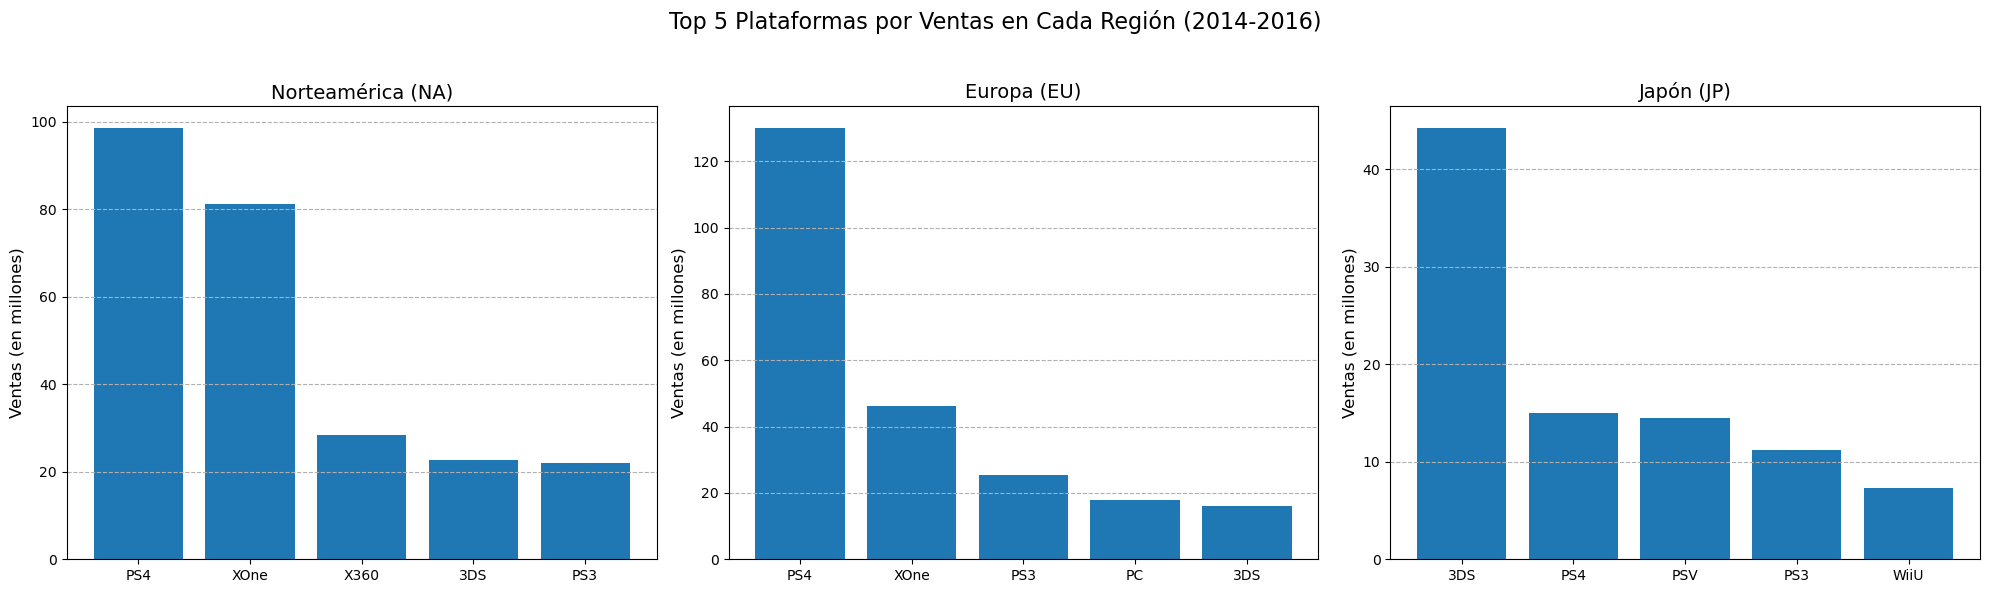

In [20]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
region_titles = {
    'na_sales': 'Norteamérica (NA)',
    'eu_sales': 'Europa (EU)',
    'jp_sales': 'Japón (JP)'}
plt.figure(figsize=(20, 6))
plt.suptitle('Top 5 Plataformas por Ventas en Cada Región (2014-2016)', fontsize=16)

for i, region in enumerate(regions):
     top_platforms = actual_df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
     plt.subplot(1, 3, i + 1)
     plt.bar(top_platforms.index, top_platforms.values)
     plt.title(region_titles[region], fontsize=14)
     plt.ylabel('Ventas (en millones)', fontsize=12)
     plt.grid(axis='y', linestyle='--')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


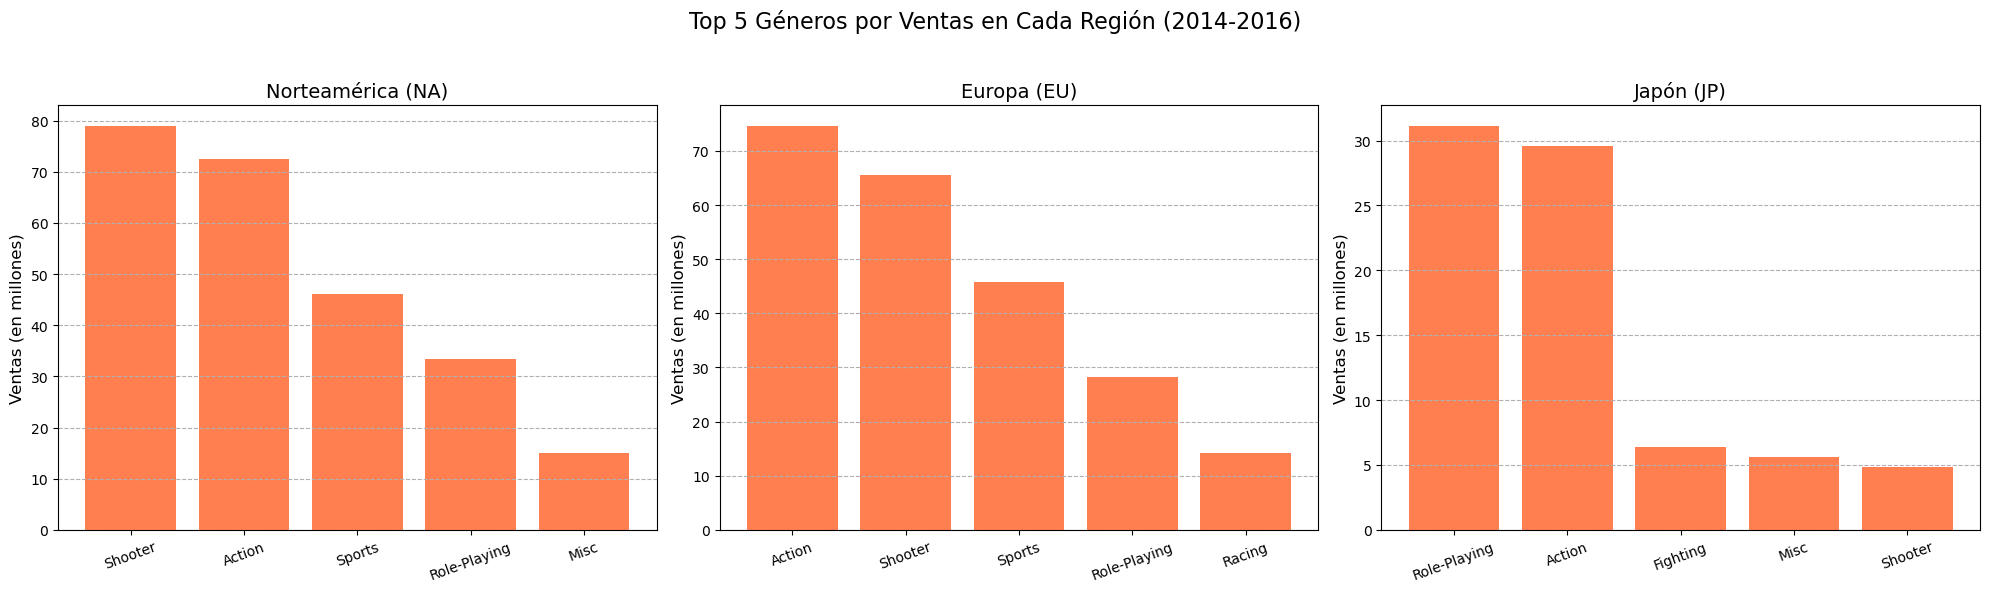

In [21]:
plt.figure(figsize=(20, 6))
plt.suptitle('Top 5 Géneros por Ventas en Cada Región (2014-2016)', fontsize=16)
for i, region in enumerate(regions):
    top_genres = actual_df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    plt.subplot(1, 3, i + 1)
    plt.bar(top_genres.index, top_genres.values, color='coral')
    plt.title(region_titles[region], fontsize=14)
    plt.ylabel('Ventas (en millones)', fontsize=12)
    plt.xticks(rotation=20)
    plt.grid(axis='y', linestyle='--')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Al analizar plataformas y géneros, todo lo que no esté incluido en el TOP-5 podría combinarse en "otros", para que la imagen del análisis sea más completa.

</div>

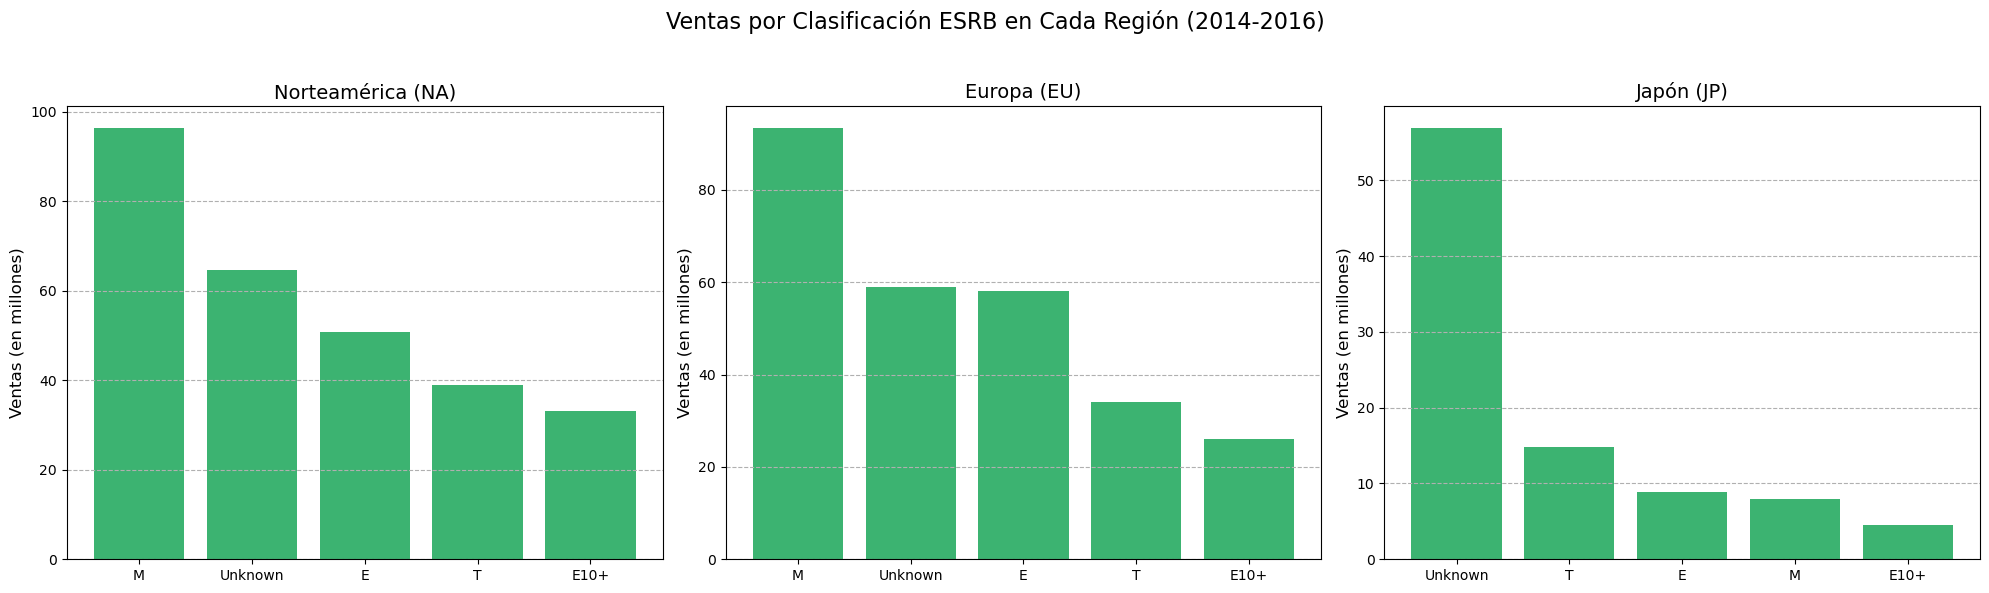

In [22]:
plt.figure(figsize=(20, 6))
plt.suptitle('Ventas por Clasificación ESRB en Cada Región (2014-2016)', fontsize=16)

for i, region in enumerate(regions):
    rating_sales = actual_df.groupby('rating')[region].sum().sort_values(ascending=False)
    plt.subplot(1, 3, i + 1)
    plt.bar(rating_sales.index, rating_sales.values, color='mediumseagreen')
    plt.title(region_titles[region], fontsize=14)
    plt.ylabel('Ventas (en millones)', fontsize=12)
    plt.grid(axis='y', linestyle='--')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Perfil de usuario para cada region

Perfil de usuario por region, NA, norte america
Los usuarios en esta region prefieren principalemente las consolas de PS4 y Xbox one, la diferencia es minima, lo que indica que hay una dura competencia entre las dos marcas. Los generos principales de esta region estan los de disparos y accion en un segundo lugar muy cercano; en cuanto a la clasificacion, los juegos mas vendidos son para usuarios maduros, lo que esta relacionado con los generos de disparon y de acion, en segundo lugar esta la clasificacion E, muy probablemente por los juegos de deportes que por lo general estan en esta clasificacion.

En Europa los usuarios tambien prefieren las consolas PS4 pero a diferencia que en America, la diferencia entre PS4 y Xbox es grande, vendiendo mas del doble; los generos principales de esta region son los de accion con poca diferencia al siguiente, disparos y deportes; en cuanto a la clasificacion, la categoria M es la categoria mas vendida, la unica diferencia con los americanos se podria decriq ue es por la preferencia a la consola.

Los usarios de Japon, es completamente diferente, este tiene una mayor preferencia a las consolas portatiles, colocando a nintendo 3DS en el primer lugar, seguido el PS4 y sorprendetentemente a la consola PS Vita; el genero que domina entre los usuarios de Japon son los juegos de roles por mucho, es segundo lugar, es el genero de accion; la mayoria de los juegos que son preferencia en Japon son los que no tienen clasificacion, esto probablemente por que han de tener su propio sistema de clasificacion, posteriormente se encuentra la clasificacion M como segundo lugar

In [23]:
xone_scores = actual_df[actual_df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = actual_df[actual_df['platform'] == 'PC']['user_score'].dropna()
alpha = 0.05
results = st.ttest_ind(xone_scores, pc_scores, equal_var=False)
print("--- Hipótesis 1: Xbox One vs. PC ---")
print(f'P-value: {results.pvalue}')
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones son diferentes.")




--- Hipótesis 1: Xbox One vs. PC ---
P-value: 0.11601398086668832
No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones son diferentes.


## Prueba de Hipotesis

La hipotesis es, la calificacion promedio de los usuarios para la plataforma Xbox One es igual a la calificacion de promedio de los usuarios de la plataforma PC, de van a comparar la media de dos grupos de muestras independientes y no son relacionadas entre si, de igual fomra hayq ue indicar que se realice una variante de prueba, que no asume que la varianza de los dos grupos son iguales. se establecio un limite alpha de 0.05 porque es elmas comun. el resultado es de 0.11, lo que seginifica desde un punto de vista estadistico, no hay una diferencia sgnificativa entre las calidficaciones, incluso aunque sus medias muestran que podrian ser diferentes. por tal motivo podemos considerar que los usiarios califican a los juegos de Xbox y PC de manera muy similar

In [24]:
action_scores = actual_df[actual_df['genre'] == 'Action']['user_score'].dropna()
sports_scores = actual_df[actual_df['genre'] == 'Sports']['user_score'].dropna()
results = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print("\n--- Hipótesis 2: Acción vs. Deportes ---")
print(f'P-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones son diferentes.")





--- Hipótesis 2: Acción vs. Deportes ---
P-value: 1.1825550382644557e-14
Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios para Acción y Deportes son diferentes.


La hipotesis es, La calificacion promedio de los usuarios para los generos de accion y deportes son diferentes, nuevamente se van a comparar las medias de manera independiente, porque los generos son independientes. como resultado el valor P nos dio un valor extremadamente pequeño. por tal motivo rechazamos la hipotesis nula, la probabilidad de observar una difrencia tan grande o mayor entre las cifras del promedio de los generos de accion y deporte como si no hubiera diferencia, es practicamente 0, la diferencia que obsrvamos en los datos es solamente un producto del azar

# Conclusion general anlisis mercado de Videojuegos

## Resumen del proyecto
    Se realizo este proyecto para poder hacer un analisis sobre los patrones y tendencias que hay en el mercado de videojuegos para poder tomar decisiones para el proximo 2017. Se realizo un proceso de limpieza para poder tener los datos listos, se realizo un analisis para conocer el ciclo de vida de las consolas, la popularidad de los generos, el impacto de los criticos expertos y de igual forma la region, se hicieron dos hipotensis basandose en los resultados y se comprobaron las mismas

## Princiales hallazgos

### El mercado y los cliclos de vida
    el analisi demostro que las consolas de videojuegos tienen un cilo de vida de aproximadamente 10 años, con un pido de ventas entre los 4 y 6 años, los datos anteriores del 2014 no son relevantes para nuestros analisis por lo que el analisis centro en el periodo del **2014-2016**

### Comportamiento de consolas 
* **Play Station 4 (PS4)** ha sido la **consola lider a nivel global** con un gran dominio principalmente en **Europa**
* **Xbox one (Xone)** siempre ha sido un gran competidor, mantiene una presencia fuerte en **Norteamerica**
* El mercado de **Japon** es especial que la consola de preferencia son las portatiles siendo el **Nintendo DS** la lider en esta region

### Analisis de generos
* El genero de **Accion** que tiene mas titulos por lo tanto es el genero que genera mas ingresos totales, pero hay una gran cantidad de titulos al grando que saturan el mercardo, el exido de in videojuego de este genero no es certera ya que la mediana por juego es relativamente baja
* El genero **Shotter** y de **Sports** demostraron se los juegos mas rentables, a pesar de tener menos lanzamientos, es notorio que la mayoria de los lanzamientos es casi una seguridad que va a ser un exito
* En Japon, el genero **Role-Playing** muestra que son el genero preferido en Japon

### Las reseñas, los critos importan, los usuarios no tanto
* se encontro que hay una realcion entre el exito de los lanzamientos y la puntuacion que colocan los critocos den cada lanzamiento, es probable que una buena critica, se considere que va a ser un exito
*  por lel contrario, no se encontro relacion entre las calificaciones de los usuarios y las ventas, lo que indica que el irrelevante la opinion de los usarios en realcion a los lanzamientos

### Perfiles regionales definidos
* **Norteamerica y Europa** tienen perfiles de consumo similares, prefieren las consolas como por ejemplo **PS4 y Xbox One** y los generos de **Accion, Disparos y Deportes** asi como los juegos de clasificacion **"M"**
* **Japon** prefiere las consolas portatiles como el **3DS** y el genero **RPG** y el contenido de videojuegos aptos para todo publico

## Resultados de las pruebas de hipotesis
1. **Xbox One vs PC (Calificaciones de usuarios):** Se concluyo que no hay diferencia estadisiticamente significativa entre las calificaciones promedio de los usuarios en ambas plataformas
2. **Accion vs Deportes (calificaciones de los usauarios):** se concluyo que existe una diferencia estadisticamente significativa entre las calificaciones promedio de los usuarios para estos dos generos

## Recomendaciones
Se recomiendan las siguientes acciones para el 2017:
1. **Priorizar la consola correcta** Principalmente en en la consula PS4 para poder maximizar el alcance global y la consola **Xbox one** como consola secundaria para el mercado norteamiericano y Europeo
2. **Invertir en los generos rentables** Los generos de Disparos y de deportes ofrecen un mejor retorno de inversion y podriamos apostar a los de Accion pero tiene que ser un excelente producto para que este nos genere una gran ganacia
3. **Estrategia de marketing** Es importante las opiniones de los criticos profecionales, por lo que seria bueno afrecer campaña enfocandose en sus ciritaas ya estas tiene un gran impacto en las los lanzamientosrelacionados a las ventas
4. **Adaptar las necesidades de acuerdo a la region** Tenemos que tener en cuenta tanto el tipo de consola que se prefiere en Norteamerica y Europa, y las preferencias en Japon, en ambos casos tambien la rpeferencia de genero 